In [1]:
import pandas as pd

aapl_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv', parse_dates=['Date'])

aapl_df.sort_values('Date', inplace=True)
aapl_df.set_index('Date', inplace=True)

aapl_df.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [2]:
from indicators import add_indicators

aapl_df = add_indicators(aapl_df)
aapl_df.tail()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,MA_20,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,4.662717,6.678882,-2.016164
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,3.748082,6.092722,-2.344640
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,3.026267,5.479431,-2.453164
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184,2.448591,4.873263,-2.424672
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001,49.359115,2.012764,4.301163,-2.288399


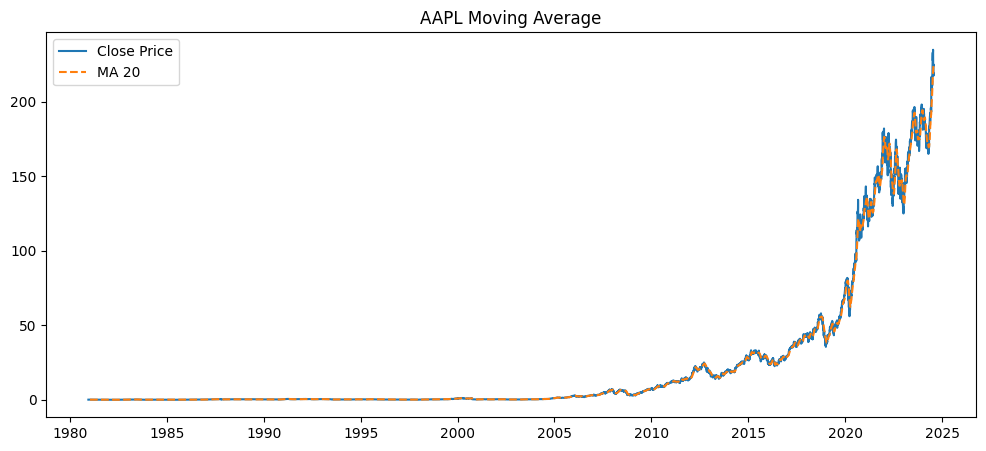

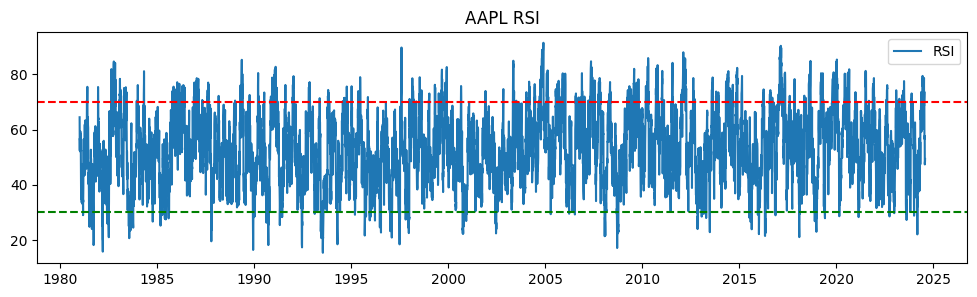

In [3]:
import matplotlib.pyplot as plt

# MA
plt.figure(figsize=(12, 5))
plt.plot(aapl_df['Close'], label='Close Price')
plt.plot(aapl_df['MA_20'], label='MA 20', linestyle='--')
plt.title('AAPL Moving Average')
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12, 3))
plt.plot(aapl_df['RSI'], label='RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('AAPL RSI')
plt.legend()
plt.show()


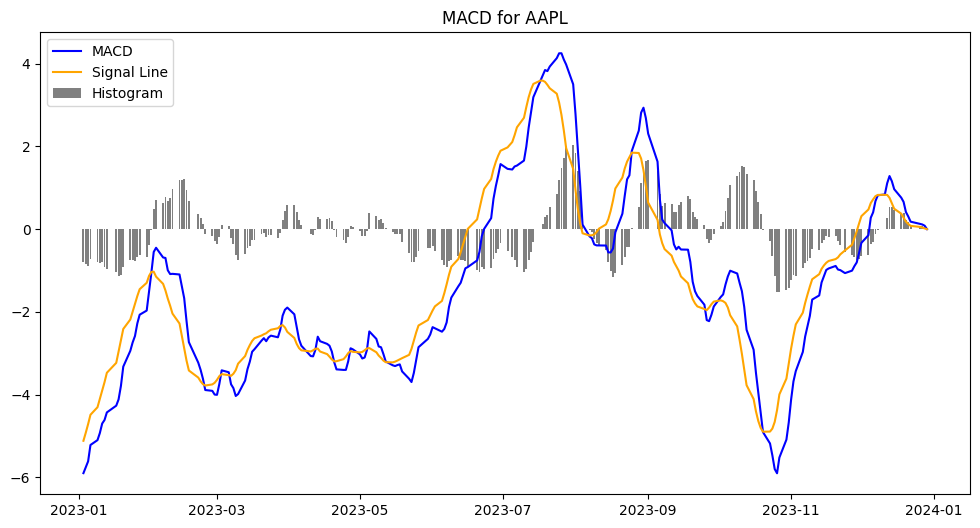

In [8]:
import pandas as pd
from pynance import data

# Fetch AAPL data
aapl = data.get("AAPL", start="2023-01-01", end="2024-01-01")

# Calculate EMAs
aapl['EMA_12'] = aapl['Close'].ewm(span=12, adjust=False).mean()
aapl['EMA_26'] = aapl['Close'].ewm(span=26, adjust=False).mean()

# MACD line
aapl['MACD'] = aapl['EMA_12'] - aapl['EMA_26']

# Signal line
aapl['Signal_Line'] = aapl['MACD'].ewm(span=9, adjust=False).mean()

# Histogram
aapl['MACD_Hist'] = aapl['MACD'] - aapl['Signal_Line']

# Plot MACD, Signal line, and Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(aapl.index, aapl['MACD'], label='MACD', color='blue')
plt.plot(aapl.index, aapl['Signal_Line'], label='Signal Line', color='orange')
plt.bar(aapl.index, aapl['MACD_Hist'], label='Histogram', color='gray')
plt.legend(loc='upper left')
plt.title('MACD for AAPL')
plt.show()


<Axes: xlabel='Date'>

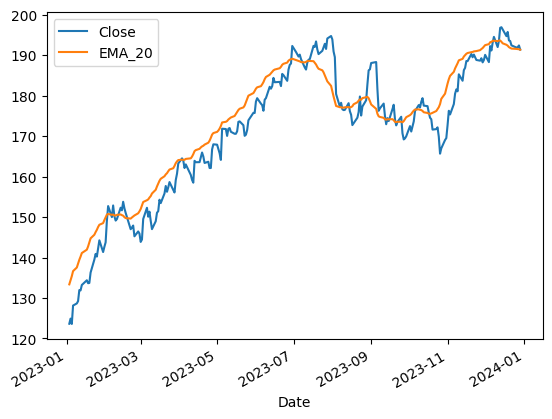

In [ ]:
import pandas as pd
from pynance import data

# Fetch data
aapl = data.get("AAPL", start="2023-01-01", end="2024-01-01")

# Calculate Exponential MA manually with pandas ewm
aapl['EMA_20'] = aapl['Close'].ewm(span=20, adjust=False).mean()

# Plot EMA and Close
aapl[['Close', 'EMA_20']].plot()
